In [1]:
# Some magic to make plots appear within the notebook
%matplotlib inline
import numpy as np # In case we need to use numpy

import pymt

✓ Avulsion
✓ Plume
✓ Sedflux3D
✓ Subside
✓ Hydrotrend
/Users/huttone/anaconda/envs/excom_demo/lib/python3.6/site-packages/landlab/bmi/components.py:13: UserWarning: unable to wrap class Lithology
  warnings.warn('unable to wrap class {name}'.format(name=cls.__name__))
/Users/huttone/anaconda/envs/excom_demo/lib/python3.6/site-packages/landlab/bmi/components.py:13: UserWarning: unable to wrap class LithoLayers
  warnings.warn('unable to wrap class {name}'.format(name=cls.__name__))
✓ Flexure
✓ OverlandFlow
✓ Child


In [2]:
child = pymt.plugins.Child()
sedflux = pymt.plugins.Sedflux3D()

child_in, child_dir = child.setup('_child',
                                  grid_node_spacing=500.,
                                  grid_x_size=40000.,
                                  grid_y_size=20000.,
                                  run_duration=1e6)
sedflux_in, sedflux_dir = sedflux.setup('_sedflux',
                                        river_bed_load_flux=0.,
                                        river_suspended_load_concentration_0=.001,
                                        river_suspended_load_concentration_1=.001,
                                        run_duration=1e6 * 365.)

child.initialize(child_in, dir=child_dir)
sedflux.initialize(sedflux_in, dir=sedflux_dir)

/Users/huttone/anaconda/envs/excom_demo/lib/python3.6/site-packages/pymt/utils/decorators.py:60: UserWarning: Call to deprecated function get_grid_size.
  name=func.__name__
/Users/huttone/anaconda/envs/excom_demo/lib/python3.6/site-packages/pymt/utils/decorators.py:60: UserWarning: Call to deprecated function get_grid_size.
  name=func.__name__


In [3]:
gid = child.var['land_surface__elevation'].grid
x, y = child.get_grid_x(gid), child.get_grid_y(gid)
z = child.get_value('land_surface__elevation')

/Users/huttone/anaconda/envs/excom_demo/lib/python3.6/site-packages/pymt/utils/decorators.py:60: UserWarning: Call to deprecated function get_grid_size.
  name=func.__name__
/Users/huttone/anaconda/envs/excom_demo/lib/python3.6/site-packages/pymt/utils/decorators.py:60: UserWarning: Call to deprecated function get_grid_size.
  name=func.__name__


In [4]:
x_shore = 20000.
z[np.where(x > x_shore)] += 100.
z[np.where(x <= x_shore)] -= 100.

child.set_value('land_surface__elevation', z)

array([-100.        , -100.        , -100.        , ...,   99.99964955,
         99.56988064,  100.34489894])

In [5]:
sedflux.set_value('bedrock_surface__elevation', mapfrom=('land_surface__elevation', child))

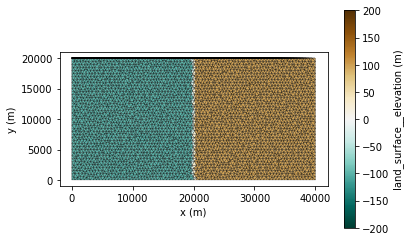

In [6]:
child.quick_plot('land_surface__elevation', edgecolors='k', vmin=-200, vmax=200, cmap='BrBG_r')

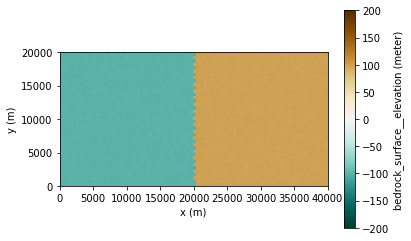

In [7]:
sedflux.quick_plot('bedrock_surface__elevation', vmin=-200, vmax=200, cmap='BrBG_r')

In [8]:
now = child.get_current_time()
times = np.arange(now, now + 100, 1.)
for t in times:
    child.update_until(t, units='years')

    sedflux.set_value('channel_water_sediment~bedload__mass_flow_rate',
                      mapfrom=child)
    sedflux.update_until(t, units='years')
    
    z = child.get_value('land_surface__elevation')
    child.set_value('land_surface__elevation',
                    mapfrom=('land-or-seabed_sediment_surface__elevation', sedflux),
                    nomap=np.where(z>0.))